In [2]:
import pandas as pd
import os

dir_in = os.path.join("..", "Data", "cutROI")
new_file = "output2eROI_all_wt_ops.csv"
opyield = 40
muons = pd.read_csv(os.path.join(dir_in, new_file), index_col=False)
muons = muons[muons.energydeposition > 0]

In [3]:
op_yield = 40 # 40 op /kev
muons["OPcounter"] = muons.energydeposition * op_yield * muons.OPs
muons["energydetected"] = muons.OPcounter / op_yield

In [4]:
# Load Ar39 data
dir_in = os.path.join("..", "Data", "ar39")
filename = "all_ar39.csv"

ar39 = pd.read_csv(os.path.join(dir_in, filename), index_col=False)
ar39.time = ar39.time.astype("float")
ar39["sec"] = ar39.time / 1000000000    # add field for time in seconds
ar39 = ar39.sort_values("time")

In [5]:
muons_gb = muons.groupby("eventnumber").energydeposition.sum()
ar39_gb = ar39.groupby("eventnumber").energydeposition.sum()

In [6]:
ar39_11k = ar39_gb.iloc[:len(muons_gb)]

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 35})

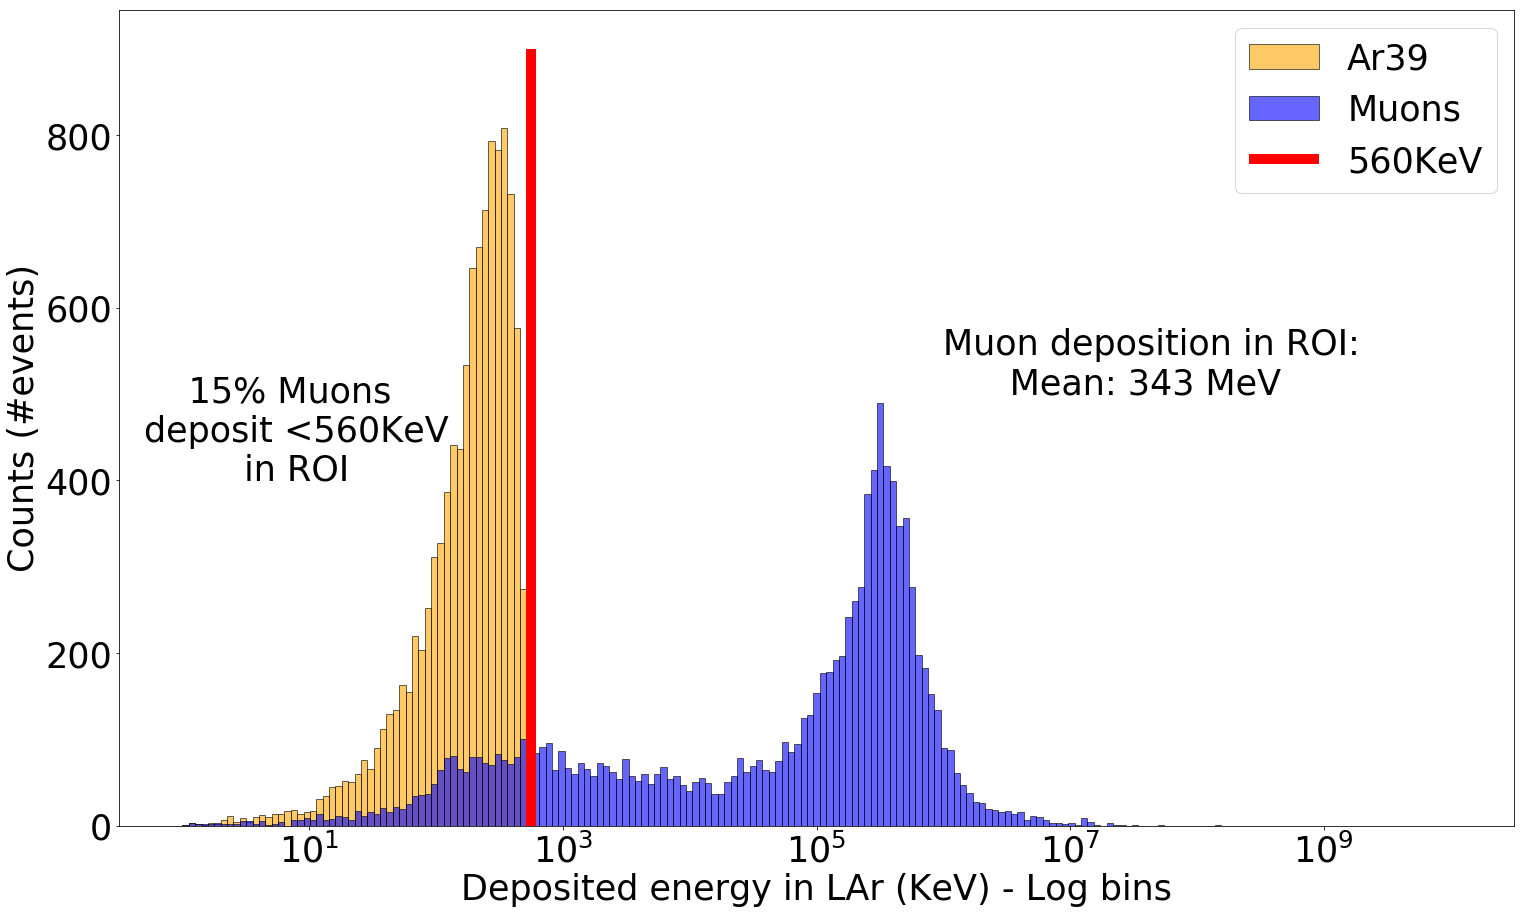

In [35]:
bins = np.logspace(0, 10, 200)
alpha = 0.6
plt.hist(ar39_11k, bins=bins, alpha=alpha, edgecolor='k', color='orange', label="Ar39")
plt.hist(muons_gb, bins=bins, alpha=alpha, edgecolor='k', color='blue', label="Muons")
plt.xscale("log")
plt.vlines(560, 0, 900, color='r', linewidth=10, label="560KeV")
plt.legend()
plt.xlabel("Deposited energy in LAr (KeV) - Log bins")
plt.ylabel("Counts (#events)")
plt.text(10**6, 500, "Muon deposition in ROI:\n      Mean: {:.0f} MeV".format(muons_gb.describe()['mean']/1000))
plt.text(.5, 400, "    15% Muons\ndeposit <560KeV\n         in ROI")
plt.show()

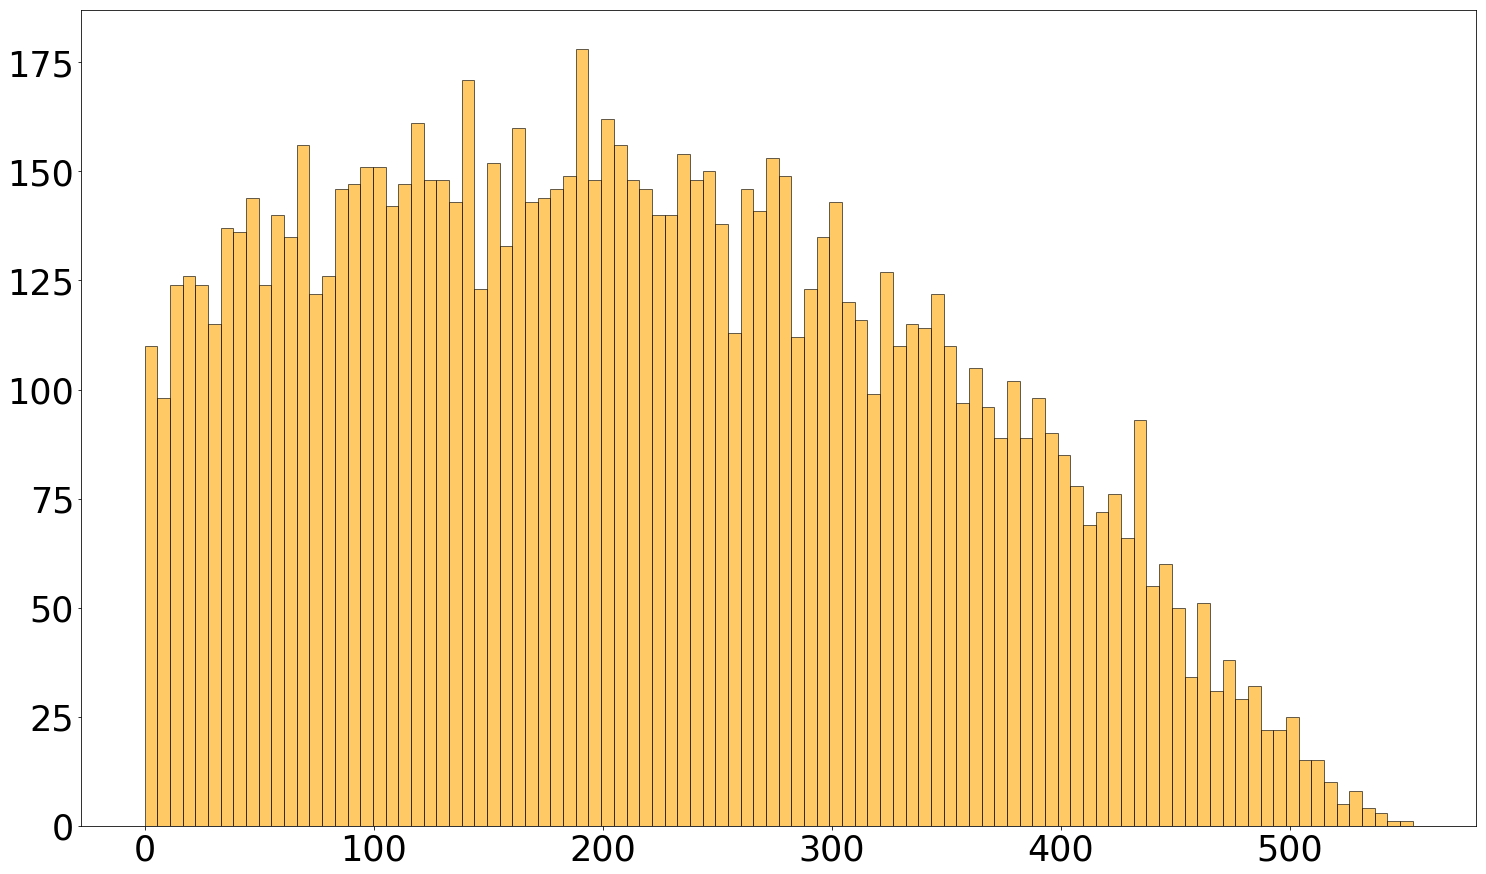

In [37]:
plt.hist(ar39_11k, bins=100, alpha=alpha, edgecolor='k', color='orange', label="Ar39")
plt.show()

In [57]:
muons[muons.energydeposition>0].groupby("creatorprocess").energydeposition.sum().sort_values()

creatorprocess
positronNuclear          4.281780e+01
muBrems                  6.412600e+01
nCapture                 4.052671e+02
dInelastic               2.129456e+03
electronNuclear          2.882908e+03
CoulombScat              2.702400e+04
muMinusCaptureAtRest     1.374826e+05
RadioactiveDecay         1.424514e+05
hBertiniCaptureAtRest    1.682966e+05
annihil                  2.712220e+05
kaon0LInelastic          5.187100e+05
Decay                    5.941050e+05
photonNuclear            8.378332e+05
hadElastic               1.013007e+06
hIoni                    1.035229e+06
eBrem                    1.793018e+06
muonNuclear              1.825535e+06
protonInelastic          3.376788e+06
pi+Inelastic             4.002669e+06
pi-Inelastic             4.120944e+06
neutronInelastic         5.090812e+06
phot                     4.375615e+07
muPairProd               7.748292e+07
eIoni                    2.215096e+08
muIoni                   4.083801e+08
compt                    4.674073e+